# Import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [29]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America  7/10/2022
1      C0002      Elizabeth Lutz           Asia  2/13/2022
2      C0003      Michael Rivera  South America   3/7/2024
3      C0004  Kathleen Rodriguez  South America  10/9/2022
4      C0005         Laura Weber           Asia  8/15/2022
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID  TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  8/25/2024 12:38         1      300.68   
1        T00112      C0146      P067  5/27/2024 22:23         1      300.68   
2        T00166      C0127      P067   4/25/2024 7:38        

# Check basic info and structure of datasets

In [30]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [31]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [32]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


# Check for missing values

In [33]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [34]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [35]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Check for duplicate rows

In [36]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


# Convert date columns to datetime format

In [37]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Remove duplicates if any

In [38]:
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Handle missing values (if any)

In [39]:
customers = customers.fillna('Unknown')
products = products.fillna({'Price': products['Price'].mean()})
transactions = transactions.fillna(0)

# Merge datasets for unified analysis

In [40]:
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

# Inspect merged dataset

In [41]:
print(transactions.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:00         1   
1        T00112      C0146      P067 2024-05-27 22:23:00         1   
2        T00166      C0127      P067 2024-04-25 07:38:00         1   
3        T00272      C0087      P067 2024-03-26 22:55:00         2   
4        T00363      C0070      P067 2024-03-21 15:10:00         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

# Basic statistics

In [42]:
print(transactions.describe())

                  TransactionDate     Quantity   TotalValue     Price_x  \
count                        1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:32:32.580000     2.537000   689.995560   272.55407   
min           2023-12-30 15:29:00     1.000000    16.080000    16.08000   
25%           2024-03-25 22:05:00     2.000000   295.295000   147.95000   
50%           2024-06-26 17:21:30     3.000000   588.880000   299.93000   
75%           2024-09-19 14:19:30     4.000000  1011.660000   404.40000   
max           2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                           NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299.93000  
75%              2

In [43]:
print(transactions['Region'].value_counts())

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


In [44]:
print(transactions['Category'].value_counts())

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


# Convert MonthYear to string

In [45]:
# Extract Month-Year from TransactionDate
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M').astype(str)

# Group by MonthYear and calculate Total Revenue
revenue_trend = transactions.groupby('MonthYear', as_index=False)['TotalValue'].sum()

# Plot the Visualizations

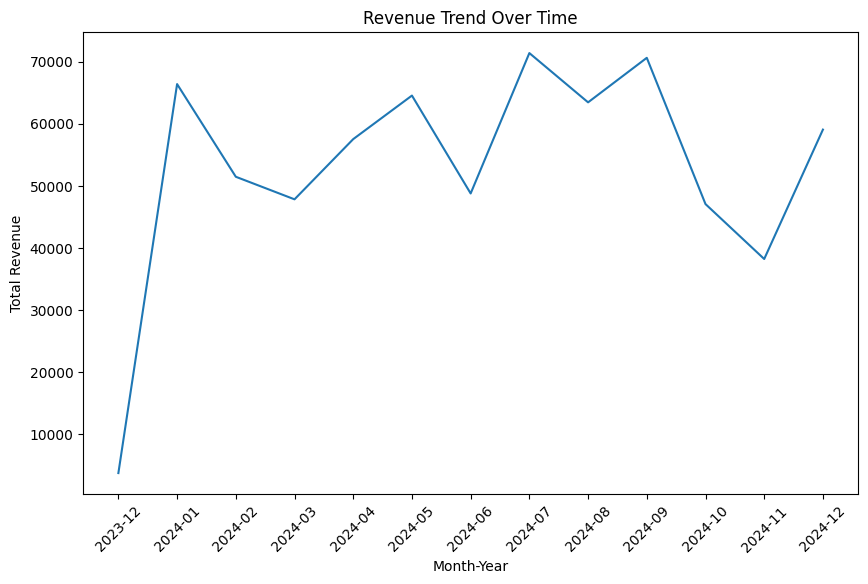

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_trend, x='MonthYear', y='TotalValue')
plt.title('Revenue Trend Over Time')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.xlabel('Month-Year')
plt.show()


# Group data for region revenue & Sales

In [47]:
region_revenue = transactions.groupby('Region')['TotalValue'].sum().reset_index()
category_sales = transactions.groupby('Category')['Quantity'].sum().reset_index()

In [48]:
region_revenue['Region'] = region_revenue['Region'].astype(str)
category_sales['Category'] = category_sales['Category'].astype(str)

# Plot the Visualizations

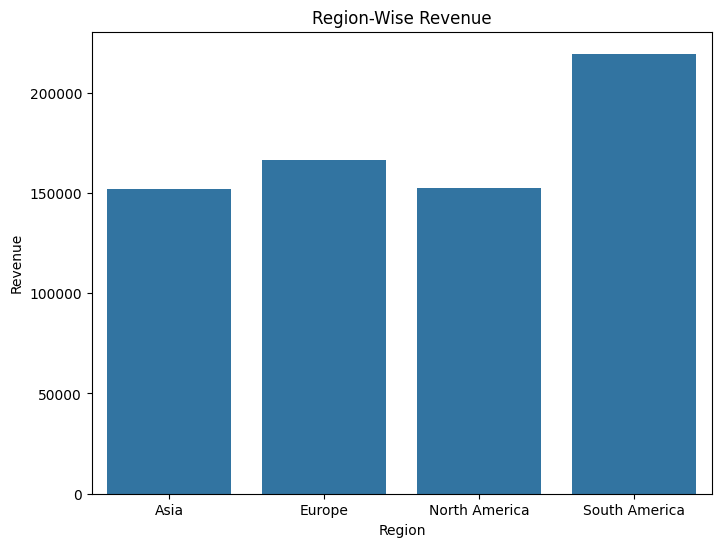

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(data=region_revenue, x='Region', y='TotalValue')
plt.title('Region-Wise Revenue')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.show()


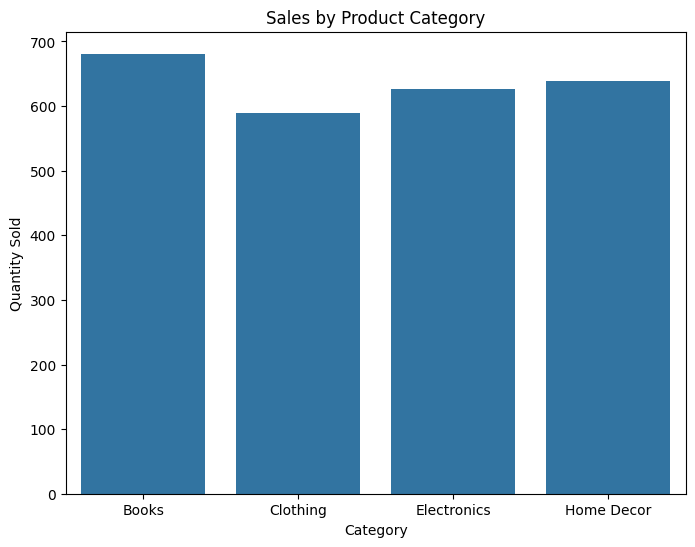

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(data=category_sales, x='Category', y='Quantity')
plt.title('Sales by Product Category')
plt.ylabel('Quantity Sold')
plt.xlabel('Category')
plt.show()


In [51]:
print(transactions.head())
print(transactions.columns)

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:00         1   
1        T00112      C0146      P067 2024-05-27 22:23:00         1   
2        T00166      C0127      P067 2024-04-25 07:38:00         1   
3        T00272      C0087      P067 2024-03-26 22:55:00         2   
4        T00363      C0070      P067 2024-03-21 15:10:00         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y MonthYear  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68   2024-08  
1  ComfortLiving Bluetooth

# Identify high-value customers

In [53]:
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
high_value_customers = customer_revenue[customer_revenue['TotalValue'] > customer_revenue['TotalValue'].quantile(0.90)]

# Display high-value customers

In [54]:
print(high_value_customers)

    CustomerID  TotalValue
12       C0013     6000.56
27       C0028     6819.57
40       C0041     6149.78
44       C0045     6021.80
53       C0054     8040.39
58       C0059     7073.28
64       C0065     7663.70
67       C0068     5950.42
81       C0082     7572.91
86       C0087     6604.23
95       C0096     6072.92
98       C0099     6715.72
101      C0102     6132.36
103      C0104     6579.10
140      C0141    10673.87
142      C0143     6044.63
155      C0156     7634.45
164      C0165     6708.10
174      C0175     6210.53
186      C0188     7111.32
